In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import time
import pandas_datareader
import scipy.stats as st

In [5]:
symbols = ['FDX', 'UPS', 'TGT','GM','TM','LUV','DAL','TWTR','FB','WMT']
#stock=[]
#stockfinal=pd.DataFrame()
#for ticker in symbols:
#    stock=yf.download(ticker, start="2019-01-01", end="2020-12-31")
#    if len(stock)!=0:
#        stock["Name"]=ticker
#        stockfinal=stockfinal.append(stock, sort=False)
#stockfinal.to_csv("outputData/stocks.csv", encoding = 'utf-8')
stockfinal= pd.read_csv("outputData/stocks.csv")
stockfinal

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2019-01-02,158.520004,163.380005,157.570007,163.190002,158.252838,2125700,FDX
1,2019-01-03,161.789993,163.070007,156.960007,157.190002,152.434372,3033300,FDX
2,2019-01-04,160.199997,164.979996,159.500000,164.429993,159.455338,2938600,FDX
3,2019-01-07,164.889999,166.850006,162.149994,166.729996,161.685776,2989400,FDX
4,2019-01-08,168.699997,169.419998,165.309998,167.020004,161.966980,2610700,FDX
...,...,...,...,...,...,...,...,...
5035,2020-12-23,143.539993,144.220001,142.300003,143.220001,143.220001,6810200,WMT
5036,2020-12-24,143.539993,144.389999,143.179993,143.500000,143.500000,3018200,WMT
5037,2020-12-28,144.039993,145.300003,143.330002,145.220001,145.220001,6448300,WMT
5038,2020-12-29,145.639999,145.850006,143.589996,144.300003,144.300003,5979400,WMT


In [6]:
stock_group=stockfinal.groupby("Name")
stock_describe=stock_group["Close"].describe()
stock_describe

,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
DAL,504.0,45.129881,13.342683,19.190001,31.199999,50.330000,57.187500,63.160000
FB,504.0,208.017579,39.598348,131.740005,179.985001,196.760002,235.744995,303.910004
FDX,504.0,176.419246,46.649264,90.489998,151.082500,163.309998,184.032497,301.450012
GM,504.0,34.000179,6.110743,16.799999,29.827500,35.840000,38.437500,46.459999
LUV,504.0,46.537341,9.122355,23.870001,38.265000,50.425001,53.852499,58.540001
TGT,504.0,112.107957,29.655817,65.529999,86.197500,110.540001,125.820002,179.820007
TM,504.0,130.135397,8.756029,108.500000,122.907503,129.389999,136.574997,155.089996
TWTR,504.0,36.362024,6.372567,22.000000,31.607501,35.765001,40.360001,55.869999
UPS,504.0,120.197064,24.729566,86.169998,102.074997,114.375000,121.247498,176.539993


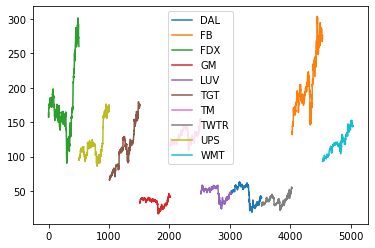

In [7]:
stock_group["Close"].plot()
plt.legend()
plt.show()

In [14]:
stockfinal=stockfinal.reset_index()
mins=stock_group["Close"].min()
maxs=stock_group["Close"].max()
#mins_data=pd.DataFrame()
#maxs_data=pd.DataFrame()
for ticker in symbols:
    mins_data=stockfinal[(stockfinal["Name"]==ticker) & (stockfinal["Close"]==mins[ticker])]
    maxs_data=maxs_data.append(stockfinal[(stockfinal["Name"]==ticker) & (stockfinal["Close"]==maxs[ticker])])
mins_data

,level_0,index,Date,Open,High,Low,Close,Adj Close,Volume,Name
4537,4537,4537,2019-01-03,93.209999,94.709999,92.699997,92.860001,89.522263,8277300,WMT


In [12]:
maxs_data

,Date,Open,High,Low,Close,Adj Close,Volume,Name
488,2020-12-08,298.000000,303.649994,297.720001,301.450012,300.776428,2889100,FDX
952,2020-10-12,174.860001,176.800003,174.210007,176.539993,175.469986,2274000,UPS
1488,2020-11-25,177.729996,180.479996,177.350006,179.820007,179.820007,3780700,TGT
1991,2020-11-24,45.910000,46.709999,45.070000,46.459999,46.459999,20048700,GM
2510,2020-12-16,154.160004,155.479996,153.000000,155.089996,155.089996,266100,TM
2801,2020-02-13,58.060001,58.689999,57.849998,58.540001,58.315563,2401800,LUV
3158,2019-07-16,61.880001,63.259998,61.720001,63.160000,61.866245,10319700,DAL
3164,2019-07-24,62.389999,63.439999,62.380001,63.160000,62.263969,5718800,DAL
4024,2020-12-18,54.930000,56.080002,54.270000,55.869999,55.869999,20450300,TWTR
4448,2020-08-26,284.000000,304.670013,284.000000,303.910004,303.910004,69015200,FB


,Close,Volume,Name
Date,,,
2020-12-01,122.720001,128166800,aapl
2020-12-02,123.080002,89004200,aapl
2020-12-03,122.940002,78967600,aapl
2020-12-04,122.250000,78260400,aapl
2020-12-07,123.750000,86712000,aapl
...,...,...,...
2020-12-23,645.979980,33173000,tsla
2020-12-24,661.770020,22865600,tsla
2020-12-28,663.690002,32278600,tsla
